In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.neighbors import NearestNeighbors

%matplotlib inline

### Read the shoe data

In [2]:
shoe_data = pd.read_csv('Shoes.csv',encoding = "ISO-8859-1")

In [5]:
x = shoe_data['Gender']
x.value_counts()

Women     11100
Men        7253
Girls      2659
Boys       2546
Womens     1008
Mens        595
Unisex       96
Name: Gender, dtype: int64

### Filters the Data by Women, Men, Girls, Boys and Unisex

In [6]:
Women_Data = shoe_data[(shoe_data['Gender']=='Women') | 
                       (shoe_data['Gender']=='Womens')] 
Women_Data['Gender'].value_counts()
Women_Shoes = Women_Data['Row'] # number for the shoes

Men_Data = shoe_data[(shoe_data['Gender']=='Men') | 
                       (shoe_data['Gender']=='Mens')] 
Men_Data['Gender'].value_counts()
Men_Shoes = Men_Data['Row']

Girls_Data = shoe_data[(shoe_data['Gender']=='Girls')] 
Girls_Data['Gender'].value_counts()
Girls_Shoes = Girls_Data['Row']

Boys_Data = shoe_data[(shoe_data['Gender']=='Boys')] 
Boys_Data['Gender'].value_counts()
Boys_Shoes = Boys_Data['Row']

Unisex_Data = shoe_data[(shoe_data['Gender']=='Unisex')] 
Unisex_Data['Gender'].value_counts()
Unisex_Shoes = Unisex_Data['Row']

### Read the Feature Data

In [10]:
df = pd.read_csv('features.csv')
df.tail()

,shoe_number,0,1,2,3,4,5,6,7,8,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
25253,25253,0.000000,0.00000,2.822442,0.000000,0.0,1.100513,0.0,3.466933,0.0,...,0.0,2.238948,0.0,2.618712,0.0,0.000000,0.0,2.934636,0.0,1.678181
25254,25254,0.000000,1.06385,0.183473,1.444844,0.0,0.563876,0.0,0.558887,0.0,...,0.0,0.492249,0.0,3.365807,0.0,0.000000,0.0,2.263286,0.0,0.000000
25255,25255,0.050072,0.00000,2.465157,0.000000,0.0,0.282674,0.0,0.000000,0.0,...,0.0,0.197933,0.0,3.513182,0.0,2.358734,0.0,5.324767,0.0,0.630338
25256,25256,0.000000,0.00000,3.475690,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.531141,0.0,5.769824,0.0,0.000000,0.0,4.421978,0.0,2.824965
25257,25257,0.000000,0.00000,0.173585,0.000000,0.0,0.000000,0.0,5.833847,0.0,...,0.0,2.430494,0.0,5.797440,0.0,1.900185,0.0,2.878265,0.0,0.000000


In [11]:
# uses the shoe number as the index
df.set_index('shoe_number',inplace=True)

### Function to Show the Shoes

In [12]:
def plot_shoes(indices):
    plt.figure(figsize=[15,10])

    plt.subplot(2,2,1)
    im = mpimg.imread('ZShoes/Images/'+str(indices[0][0])+'.jpg')
    plt.imshow(im)
    plt.title('Original - '+ str(indices[0][0]))
    plt.axis('off')

    plt.subplot(2,2,2)
    im = mpimg.imread('ZShoes/Images/'+str(indices[0][1])+'.jpg')
    plt.imshow(im);
    plt.title('Recommendation 1 - '+ str(indices[0][1]))
    plt.axis('off')

    plt.subplot(2,2,3)
    im = mpimg.imread('ZShoes/Images/'+str(indices[0][2])+'.jpg')
    plt.imshow(im);
    plt.title('Recommendation 2 - '+ str(indices[0][2]))
    plt.axis('off')

    plt.subplot(2,2,4)
    im = mpimg.imread('ZShoes/Images/'+str(indices[0][3])+'.jpg')
    plt.imshow(im);
    plt.title('Recommendation 3 - '+ str(indices[0][3]))
    plt.axis('off');

In [13]:
Women_Features = df.loc[Women_Shoes]
Men_Features = df.loc[Men_Shoes]
Girls_Features = df.loc[Girls_Shoes]
Boys_Features = df.loc[Boys_Shoes]
Unisex_Features = df.loc[Unisex_Shoes]

# Women_Features.head()

In [14]:
eucl_W = NearestNeighbors(n_neighbors=4,metric='euclidean').fit(Women_Features)
eucl_M = NearestNeighbors(n_neighbors=4,metric='euclidean').fit(Men_Features)
eucl_G = NearestNeighbors(n_neighbors=4,metric='euclidean').fit(Girls_Features)
eucl_B = NearestNeighbors(n_neighbors=4,metric='euclidean').fit(Boys_Features)
eucl_U = NearestNeighbors(n_neighbors=4,metric='euclidean').fit(Unisex_Features)

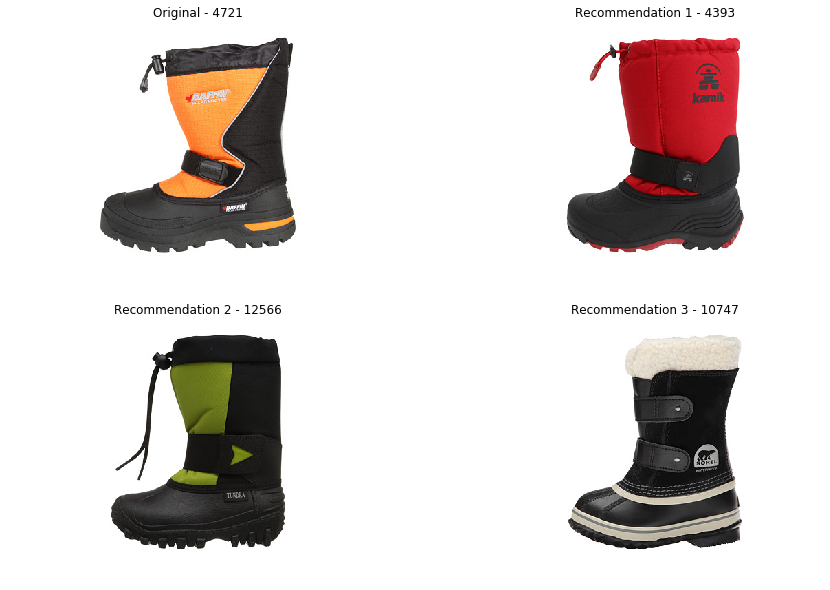

In [23]:
sample = 15 # index of row
shoe_type = 'Unisex' # Options are Women, Men, Girls, Boys, Unisex

if shoe_type == 'Women':
    distances, indices = eucl_W.kneighbors(Women_Features.iloc[sample].values.reshape(1,-1))
    shoe_ind = []
    for ind in indices:
        shoe_ind.append(Women_Features.index[ind])
elif shoe_type == 'Men':
    distances, indices = eucl_M.kneighbors(Men_Features.iloc[sample].values.reshape(1,-1))
    shoe_ind = []
    for ind in indices:
        shoe_ind.append(Men_Features.index[ind])
elif shoe_type == 'Girls':
    distances, indices = eucl_G.kneighbors(Girls_Features.iloc[sample].values.reshape(1,-1))
    shoe_ind = []
    for ind in indices:
        shoe_ind.append(Girls_Features.index[ind])
elif shoe_type == 'Boys':
    distances, indices = eucl_B.kneighbors(Boys_Features.iloc[sample].values.reshape(1,-1))
    shoe_ind = []
    for ind in indices:
        shoe_ind.append(Boys_Features.index[ind])
else:
    distances, indices = eucl_U.kneighbors(Unisex_Features.iloc[sample].values.reshape(1,-1))
    shoe_ind = []
    for ind in indices:
        shoe_ind.append(Unisex_Features.index[ind])

plot_shoes(shoe_ind)

In [24]:
distances, indices_W = eucl_W.kneighbors(Women_Features)

In [25]:
distances, indices_M = eucl_M.kneighbors(Men_Features)

In [26]:
distances, indices_G = eucl_G.kneighbors(Girls_Features)
distances, indices_B = eucl_B.kneighbors(Boys_Features)
distances, indices_U = eucl_U.kneighbors(Unisex_Features)

In [56]:
Data_Wom = pd.DataFrame(np.array(Women_Features.index[indices_W]))
Data_Men = pd.DataFrame(np.array(Men_Features.index[indices_M]))
Data_Gir = pd.DataFrame(np.array(Girls_Features.index[indices_G]))
Data_Boy = pd.DataFrame(np.array(Boys_Features.index[indices_B]))
Data_Uni = pd.DataFrame(np.array(Unisex_Features.index[indices_U]))

In [86]:
x = pd.concat([Data_Wom,Data_Men,Data_Gir,Data_Boy,Data_Uni], ignore_index=True)

In [87]:
x.sort_values(by=0,inplace=True)
x.reset_index(inplace=True)
del x['index']
x.head()

,0,1,2,3
0,1,15789,12704,517
1,2,5385,9,3695
2,3,12865,3376,3130
3,4,21493,25038,3124
4,5,1349,16917,1338
